In [1]:
from keras.models import load_model
from mod_gendata import *
import matplotlib.pyplot as plt
from mod_cutregion import *

Using TensorFlow backend.


In [2]:
autoencoder = load_model("./pwat_convae1000_2knl_addchnl_peraug.h5") # models9

In [3]:
# model archetecture 
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          2080      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          8256      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         32896     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 64)          32832     
__________

In [4]:
# load test dataset
keyward = 'pwat'
lat     = 181 ; lon = 360 
testdir= '/home/kurihana/ml_model/work_mymodel/ex4/data/test_data'
gd     = gen_grads_data()
x_test = gd.load_key_data(testdir, keyward)
x_test = x_test.reshape(x_test.shape[0],lat,lon)

 Max value   93.2


In [5]:
# Select Region
sg = sl_region()

# Descripition fot "get_region" API
#
# get_region(data, data_dimension, all_lat, all_lon. nlat, slat, wlon, elon)
# all_lat/lon : original data's lat/lon
# nlat = north latitude in selected region

x_test  = sg.get_region(x_test, 3, lat, lon, 64, 0, 225, 289)

(80, 64, 64)


In [6]:
# Add channel dimension
nlat = 64 # based on get_region number
nlon = 64
x_test = x_test.reshape(x_test.shape[0], nlat, nlon, 1)

In [7]:
decoded_imgs = autoencoder.predict(x_test)

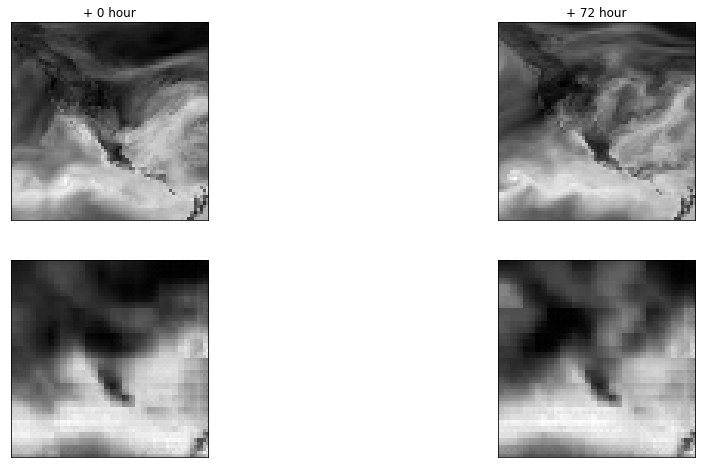

In [8]:
n = 2
plt.figure(figsize=(16,8))
image_list = [0, 12]
#for i in range(n):
for index, i in enumerate(image_list):
     # test data
     ax = plt.subplot(2,n,index+1)
     plt.imshow(x_test[i].reshape(nlat,nlon))
     plt.gray()
     itime = int(i*6)
     plt.title('+ %d hour'% itime )
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

     # decoded data 
     ax = plt.subplot(2,n,index+1+n)
     plt.imshow(decoded_imgs[i].reshape(nlat,nlon))
     plt.gray()
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

plt.show()

In [9]:
# Compare with shallower network and channels
# ====================  models8 vz models9 ====================
autoencoder = load_model("./pwat_convae1000_2knldeeper_peraug.h5")  # models8

In [10]:
# model archetecture 
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          2080      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 32)        8224      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        2064      
__________

In [11]:
# load test dataset
keyward = 'pwat'
lat     = 181 ; lon = 360 
testdir= '/home/kurihana/ml_model/work_mymodel/ex4/data/test_data'
gd     = gen_grads_data()
x_test = gd.load_key_data(testdir, keyward)
x_test = x_test.reshape(x_test.shape[0],lat,lon)

 Max value   93.2


In [12]:
# Select Region
sg = sl_region()

# Descripition fot "get_region" API
#
# get_region(data, data_dimension, all_lat, all_lon. nlat, slat, wlon, elon)
# all_lat/lon : original data's lat/lon
# nlat = north latitude in selected region

x_test  = sg.get_region(x_test, 3, lat, lon, 64, 0, 225, 289)

(80, 64, 64)


In [13]:
# Add channel dimension
nlat = 64 # based on get_region number
nlon = 64
x_test = x_test.reshape(x_test.shape[0], nlat, nlon, 1)

In [14]:
decoded_imgs = autoencoder.predict(x_test)

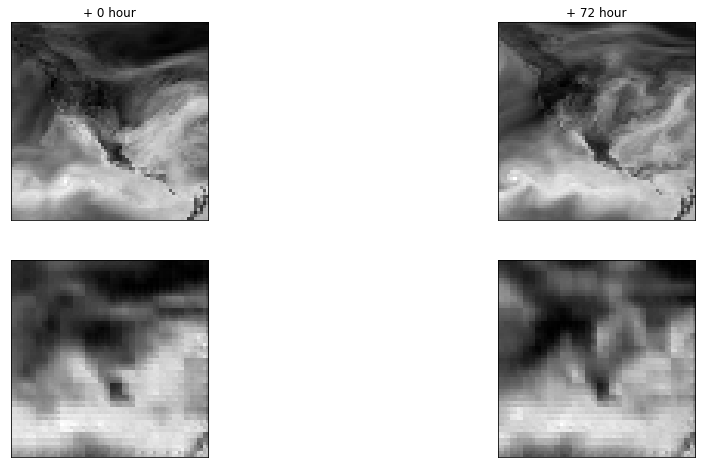

In [15]:
n = 2
plt.figure(figsize=(16,8))
image_list = [0, 12]
#for i in range(n):
for index, i in enumerate(image_list):
     # test data
     ax = plt.subplot(2,n,index+1)
     plt.imshow(x_test[i].reshape(nlat,nlon))
     plt.gray()
     itime = int(i*6)
     plt.title('+ %d hour'% itime )
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

     # decoded data 
     ax = plt.subplot(2,n,index+1+n)
     plt.imshow(decoded_imgs[i].reshape(nlat,nlon))
     plt.gray()
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)

plt.show()